In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# ignore all FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [81]:
# indices en la primera columna
datos_procesados = pd.read_csv('data_procesada.csv', sep=',', encoding='utf-8', index_col=0)
datos_procesados.head()
datos_procesados.reset_index(drop=True, inplace=True)

## Análisis de Datos

### Análisis Estadístico

Media: 3334.6581320026503


Text(0.5, 1.0, 'Depressive disorder rates (number suffering per 100,000)')

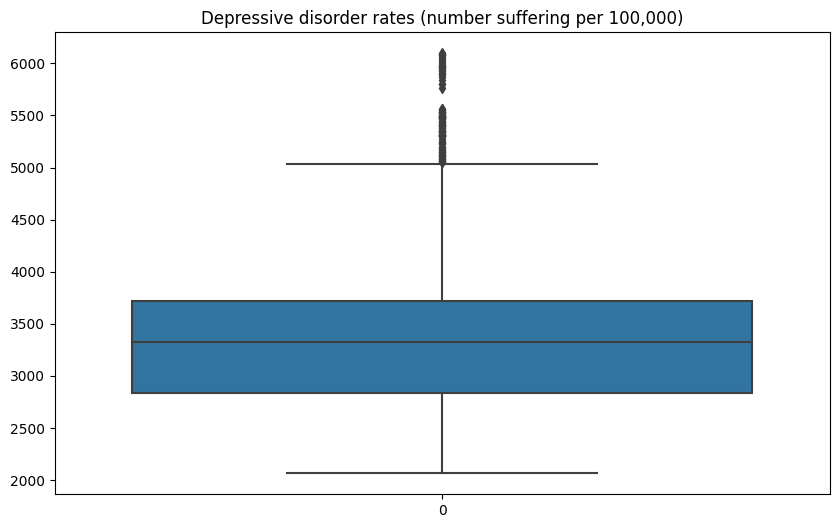

In [82]:
#sacar la media, hacer caja de bigotes de 'Depressive disorder rates (number suffering per 100,000)'

mean = datos_procesados['Depressive disorder rates (number suffering per 100,000)'].mean()
print (f'Media: {mean}')

plt.figure(figsize=(10,6))
sns.boxplot(datos_procesados['Depressive disorder rates (number suffering per 100,000)'])
plt.title('Depressive disorder rates (number suffering per 100,000)')

#### Resultado Estadístico
En base a los resultados obtenidos, se puede afirmar que la media es de 3334.65, aproximadamente 3335 personas que sufren depresión por cada 100,000 habitantes.

El análisis de la gráfica de caja y bigotes indica que el cuartil superior se encuentra entre 3500 y 4000 personas con depresión por cada 100,000 habitantes, mientras que el cuartil inferior oscila entre 2600 y 3000 personas por cada 100,000 habitantes. Aunque los valores atípicos pueden alcanzar hasta 6000 personas, se puede concluir que esta variable es adecuada para su uso, ya que los valores se mantienen en rangos similares.

### Presencia: Baja, Media y Alta de la Depresión

Para este punto y este modelo, se decidió agregar una nueva variable que indica la presencia de la depresión en tres niveles, según la cantidad de personas que la padecen por cada 100,000 habitantes. La clasificación es la siguiente: 1 representa una presencia baja, 2 una presencia media y 3 una presencia alta.

Para definir esta variable, se utilizaron como umbrales el cuartil inferior (2800) y el cuartil superior (3800), estableciendo así los límites para cada nivel de presencia de depresión.

In [83]:
bajo = 2800
alto = 3800
datos_procesados['Depression_binary'] = np.where(datos_procesados['Depressive disorder rates (number suffering per 100,000)'] > alto, 2 , np.where(datos_procesados['Depressive disorder rates (number suffering per 100,000)'] > bajo, 1, 0)) 
datos_procesados.head()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),...,10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%),Depression_binary
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,...,1.594676,3.218871,5.202803,5.799034,3.455708,5.175856,5.917752,4.071831,4.939766,2
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,...,1.588356,3.203468,5.192849,5.814828,3.451880,5.176729,5.927093,4.079531,4.902682,2
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,...,1.577980,3.156559,5.176872,5.829745,3.434982,5.160249,5.945656,4.088358,4.837097,2
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,...,1.577201,3.120655,5.167355,5.853060,3.420210,5.148767,5.966915,4.096190,4.813657,2
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,...,1.570846,3.082179,5.157549,5.852851,3.425222,5.148227,5.975907,4.099582,4.839340,2


In [84]:
print(datos_procesados['Depression_binary'].value_counts())

Depression_binary
1    3011
0    1192
2    1089
Name: count, dtype: int64


### Estandarización de Datos

In [85]:
#standar scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
datos_procesados_scaled = datos_procesados.copy()
datos_procesados_scaled.drop(columns=['Entity'], inplace=True)

columnas_a_escalar = datos_procesados_scaled.columns.difference(['Code', 'Depression_binary'])

datos_procesados_scaled[columnas_a_escalar] = scaler.fit_transform(datos_procesados_scaled[columnas_a_escalar])

datos_procesados_scaled.head()


,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),...,10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%),Depression_binary
0,AFG,-1.669046,-1.130788,-0.115495,-0.854313,0.777467,1.924461,0.885951,-1.030982,1.274053,...,0.569148,-0.008861,-0.618060,1.691212,0.474128,1.262396,0.251961,0.885951,0.986979,2
1,AFG,-1.540658,-1.136682,-0.114392,-0.870847,0.778270,1.941911,0.897398,-1.031719,1.281231,...,0.553161,-0.026673,-0.624645,1.706406,0.469611,1.263243,0.260895,0.897398,0.948894,2
2,AFG,-1.412270,-1.140897,-0.113501,-0.887895,0.779475,1.963742,0.910521,-1.033021,1.290220,...,0.526916,-0.080917,-0.635213,1.720756,0.449665,1.247253,0.278649,0.910521,0.881539,2
3,AFG,-1.283881,-1.143216,-0.112588,-0.903218,0.779259,1.988757,0.922163,-1.034071,1.298398,...,0.524946,-0.122438,-0.641509,1.743186,0.432229,1.236111,0.298982,0.922163,0.857466,2
4,AFG,-1.155493,-1.143575,-0.111296,-0.915552,0.777990,2.013230,0.927205,-1.034626,1.302288,...,0.508872,-0.166931,-0.647996,1.742984,0.438144,1.235588,0.307583,0.927205,0.883842,2


In [86]:
qualitative_columns = ['Code']

### Label Encoder para codificar la variable de Code (código del país)

In [87]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# LabelEncoder para las columnas cualitativas
label_encoder = LabelEncoder()

for column in qualitative_columns:
    datos_procesados_scaled[column] = label_encoder.fit_transform(datos_procesados_scaled[column])

datos_procesados_scaled.head()
datos_procesados_ecoding = datos_procesados_scaled.copy()
datos_procesados_ecoding.head()

,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),...,10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%),Depression_binary
0,0,-1.669046,-1.130788,-0.115495,-0.854313,0.777467,1.924461,0.885951,-1.030982,1.274053,...,0.569148,-0.008861,-0.618060,1.691212,0.474128,1.262396,0.251961,0.885951,0.986979,2
1,0,-1.540658,-1.136682,-0.114392,-0.870847,0.778270,1.941911,0.897398,-1.031719,1.281231,...,0.553161,-0.026673,-0.624645,1.706406,0.469611,1.263243,0.260895,0.897398,0.948894,2
2,0,-1.412270,-1.140897,-0.113501,-0.887895,0.779475,1.963742,0.910521,-1.033021,1.290220,...,0.526916,-0.080917,-0.635213,1.720756,0.449665,1.247253,0.278649,0.910521,0.881539,2
3,0,-1.283881,-1.143216,-0.112588,-0.903218,0.779259,1.988757,0.922163,-1.034071,1.298398,...,0.524946,-0.122438,-0.641509,1.743186,0.432229,1.236111,0.298982,0.922163,0.857466,2
4,0,-1.155493,-1.143575,-0.111296,-0.915552,0.777990,2.013230,0.927205,-1.034626,1.302288,...,0.508872,-0.166931,-0.647996,1.742984,0.438144,1.235588,0.307583,0.927205,0.883842,2


### Entreno del Modelo
Para entrenar el modelo se utilizaron la variable previamente creada que indica la presencia de la depresión por niveles y la variable objetivo.

In [88]:
X = datos_procesados_ecoding.drop(columns=["Depression_binary", "Depressive disorder rates (number suffering per 100,000)"])
y = datos_procesados_ecoding["Depression_binary"]

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size=0.3, random_state=0)

In [91]:
y_prueba

29      0
521     1
608     1
3795    0
2188    2
       ..
4287    1
5102    0
1202    1
4799    1
622     0
Name: Depression_binary, Length: 1588, dtype: int64

In [92]:
X_entreno.isna().sum()


Code                                                                                                         0
Year                                                                                                         0
Schizophrenia (%)                                                                                            0
Bipolar disorder (%)                                                                                         0
Eating disorders (%)                                                                                         0
Anxiety disorders (%)                                                                                        0
Drug use disorders (%)                                                                                       0
Depression (%)                                                                                               0
Alcohol use disorders (%)                                                                                    0
P

### SVC

In [93]:
from sklearn.svm import SVC
clasificador = SVC(kernel = 'linear', random_state = 0)
clasificador.fit(X_entreno, y_entreno)

SVC(kernel='linear', random_state=0)

In [94]:
y_pred = clasificador.predict(X_prueba)

In [95]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_prueba.values.reshape(len(y_prueba),1)),1))

[[0 0]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [0 0]]


#### Matriz de Confusión

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score
mat_conf = confusion_matrix(y_prueba, y_pred)
print(mat_conf)
accuracy_score(y_prueba, y_pred)

[[352   4   0]
 [  6 893   2]
 [  0   4 327]]


0.9899244332493703

In [97]:
from sklearn.metrics import classification_report

print(classification_report(y_prueba, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       356
           1       0.99      0.99      0.99       901
           2       0.99      0.99      0.99       331

    accuracy                           0.99      1588
   macro avg       0.99      0.99      0.99      1588
weighted avg       0.99      0.99      0.99      1588



# Predicción de Datos

Para realizar las predicciones de demostración, los datos se separaron los datos del año 2017 del entrenamiento, para demostrar que el modelo puede predecir correctamente datos a futuro. 

In [98]:
datos_validation = pd.read_csv('data_validation.csv', sep=',', encoding='utf-8', index_col=0)
datos_validation.reset_index(drop=True, inplace=True)
datos_validation.head()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),...,20-24 years old (%),10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%)
0,Afghanistan,AFG,2017,0.166158,0.708089,0.107142,4.882481,2.473934,4.136347,0.661217,...,4.386172,1.618270,3.050785,5.279772,5.749905,3.433750,5.105028,6.131183,4.136347,5.010372
1,Albania,ALB,2017,0.201025,0.704480,0.174046,3.385245,0.517614,2.208414,1.837955,...,2.437424,0.900396,2.607896,4.399558,2.401418,2.004014,2.398396,3.664052,2.208414,2.487747
2,Algeria,DZA,2017,0.197913,0.818687,0.213612,5.065876,1.717218,3.661094,0.665191,...,3.854475,1.757578,3.691020,4.848270,4.630534,3.404122,4.256386,5.402483,3.661094,4.522808
3,American Samoa,ASM,2017,0.248557,0.468305,0.177808,3.315834,0.772801,2.939668,1.142277,...,2.885708,1.063623,2.787788,5.746022,2.971754,2.438167,2.862544,5.451378,2.939668,3.115501
4,Andorra,AND,2017,0.263512,0.963331,0.644559,5.305375,0.910066,3.729532,1.256050,...,4.289082,1.823388,4.372485,4.827994,4.862243,3.507257,4.627740,4.882617,3.729532,4.805177


In [99]:
datos_validation['Depression_binary'] = np.where(datos_validation['Depressive disorder rates (number suffering per 100,000)'] > alto, 2 , np.where(datos_validation['Depressive disorder rates (number suffering per 100,000)'] > bajo, 1, 0))

In [100]:
datos_validation_scaled = datos_validation.copy()
datos_validation_scaled.drop(columns=['Entity'], inplace=True)

columnas_a_escalar = datos_validation_scaled.columns.difference(['Code', 'Depression_binary'])

datos_validation_scaled[columnas_a_escalar] = scaler.transform(datos_validation_scaled[columnas_a_escalar])

for column in qualitative_columns:
    datos_validation_scaled[column] = label_encoder.transform(datos_validation_scaled[column])
    
datos_validation_scaled.head()

,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),...,10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%),Depression_binary
0,0,1.797434,-0.997548,-0.052726,-0.819924,0.824737,3.738813,0.981862,-1.043945,1.411252,...,0.628827,-0.203234,-0.567144,1.643950,0.448210,1.193671,0.456093,0.981862,1.059491,2
1,2,1.797434,-0.167698,-0.074700,-0.384784,-0.494396,-0.715532,-1.884249,0.319649,-2.077225,...,-1.186945,-0.715391,-1.149415,-1.577321,-1.239377,-1.432602,-1.903552,-1.884249,-1.531238,0
2,51,1.797434,-0.241771,0.620656,-0.127448,0.986315,2.015847,0.275340,-1.039340,0.315825,...,0.981187,0.537133,-0.852587,0.567106,0.413239,0.370225,-0.240859,0.275340,0.558764,1
3,7,1.797434,0.963546,-1.512658,-0.360320,-0.555550,-0.134496,-0.797150,-0.486497,-0.622661,...,-0.774082,-0.507364,-0.258714,-1.028653,-0.726924,-0.982234,-0.194094,-0.797150,-0.886536,1
4,3,1.797434,1.319494,1.501326,2.675411,1.197325,0.178042,0.377080,-0.354657,-0.024890,...,1.147644,1.325177,-0.866000,0.790012,0.534974,0.730554,-0.738076,0.377080,0.848757,1


In [101]:
X_validation = datos_validation_scaled.drop(columns=["Depression_binary", "Depressive disorder rates (number suffering per 100,000)"])
y_validation = datos_validation_scaled["Depression_binary"]

In [102]:
y_pred_validation = clasificador.predict(X_validation)


In [103]:
mat_conf_validation = confusion_matrix(y_validation, y_pred_validation)
print(mat_conf_validation)

[[ 47   0   0]
 [  0 115   0]
 [  0   1  33]]


In [104]:
accuracy_score(y_validation, y_pred_validation)

0.9948979591836735

In [105]:
from sklearn.metrics import classification_report

print(classification_report(y_validation, y_pred_validation))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.99      1.00      1.00       115
           2       1.00      0.97      0.99        34

    accuracy                           0.99       196
   macro avg       1.00      0.99      0.99       196
weighted avg       0.99      0.99      0.99       196

